In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_tree = Tree(fc.NMSSM_MX_700_MY_400)
qcd_tree =    Tree(fc.QCD_B_List)

In [3]:
signal_tree.calc_event_shapes()
qcd_tree.calc_event_shapes()

In [4]:
def plot2d_shape(tree,xshape,yshape):
    var_x = tree[xshape]
    var_y = tree[yshape]
    info_x = shapeinfo[xshape]
    info_y = shapeinfo[yshape]
    
    hist2d_simple(var_x,var_y,xbins=info_x["bins"],ybins=info_y["bins"],xlabel=info_x["xlabel"],ylabel=info_y["xlabel"],weights=tree["scale"],lumikey=2018)

ValueError: in RecordArray attempting to get 96675, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.4.0/src/libawkward/array/RecordArray.cpp#L792)

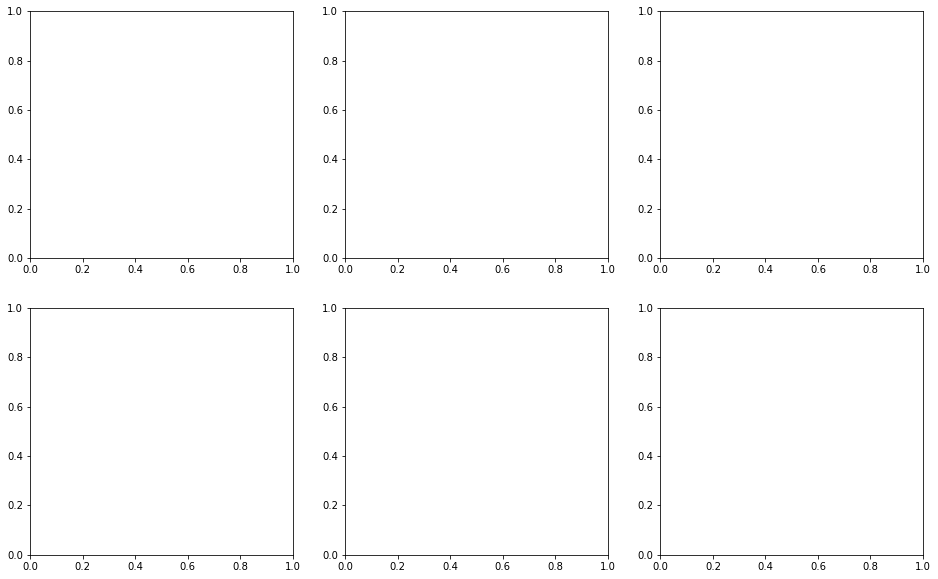

In [5]:
study.jet_sphericity(qcd_tree,signal_tree,saveas="selected_qcd_vs_signal")
study.jet_thrust(qcd_tree,signal_tree,saveas="selected_qcd_vs_signal")

In [6]:
def minmax_display(tree,key,useabs=False,printout=[],tag=None):
    value = tree[key]
    if useabs: value = np.abs(value)
    imin,imax = ak.argmin(value),ak.argmax(value)
    tree.tag = tag
    print(f"--Minimum {key}--")
    study.jet_display(tree,ie=imin,printout=printout,boosted=1,saveas=f"{tag}_min_{key}")
    print(f"--Maximum {key}--")
    study.jet_display(tree,ie=imax,printout=printout,boosted=1,saveas=f"{tag}_max_{key}")

--Minimum event_St--
event_S: 0.0018184435640604272
event_St: 0.0018490222269336412
M_eig_w1: 0.9987877042906265
M_eig_w2: 0.000924244807206523
M_eig_w3: 0.00028805090216709513
thrust_phi: 0.2656273902695936
n_jet: 6


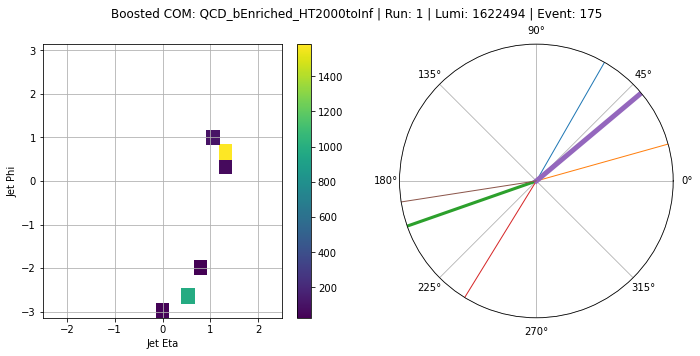

--Maximum event_St--
event_S: 0.7998889911325595
event_St: 0.982807054791089
M_eig_w1: 0.46674067257829377
M_eig_w2: 0.45096264964133603
M_eig_w3: 0.08229667778037025
thrust_phi: 0.33250007370210755
n_jet: 7


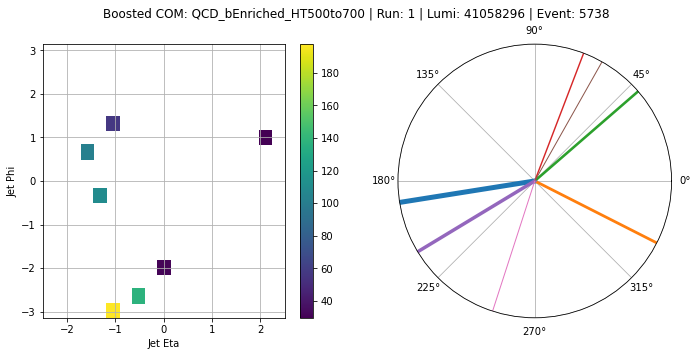

--Minimum event_St--
event_S: 0.006310626573967602
event_St: 0.004345807836366792
M_eig_w1: 0.995792915617355
M_eig_w2: 0.0021684742141606476
M_eig_w3: 0.00203861016848442
thrust_phi: -0.8674815411622192
n_jet: 6


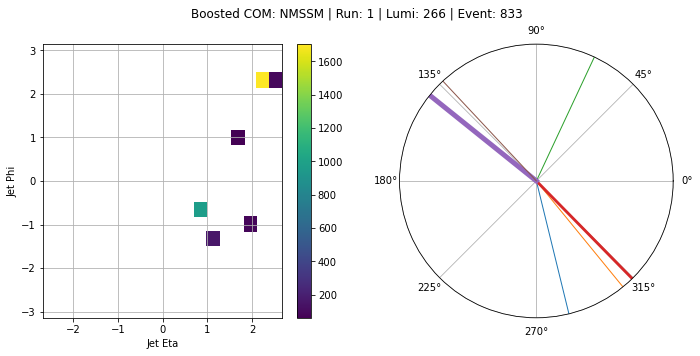

--Maximum event_St--
event_S: 0.8108764307030338
event_St: 0.9991270239647073
M_eig_w1: 0.45941571286464405
M_eig_w2: 0.4586142946683881
M_eig_w3: 0.0819699924669678
thrust_phi: 1.0996725897155557
n_jet: 6


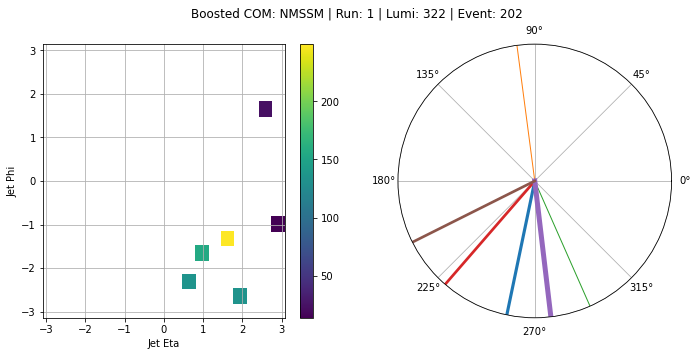

In [8]:
printout=["event_S","event_St","M_eig_w1","M_eig_w2","M_eig_w3","thrust_phi","n_jet"]
minmax_display(qcd_tree,"event_St",useabs=1,printout=printout,tag="qcd")
minmax_display(signal_tree,"event_St",useabs=1,printout=printout,tag="signal")